#Load

In [32]:
from pathlib import Path
import pandas as pd
import urllib.request


def load_housing_data():
  sold_file=Path("datasets/sold_melbourne.csv")
  if not sold_file.is_file():
    url="https://raw.githubusercontent.com/mmercan/handson-ml3/refs/heads/main/data/housing/sold_melbourne.csv"
    urllib.request.urlretrieve(url,sold_file)

    return pd.read_csv(sold_file)


housing = load_housing_data()

housing['price']=(housing['price'].str.replace('$', '', regex=False)).astype(float)

    #house['price']=house['price'].replace('[\$,]', '', regex=True).astype(float)

housing.info()
housing.head()

TypeError: 'NoneType' object is not subscriptable

In [22]:
housing["region"].value_counts()

,count
region,
western_region,26091
north_east_region,15628
bellarine_peninsula,10480
melbourne_city___greater_region,10454
gippsland,10429
melbourne___northern_region,5404
eastern_melbourne,5317
inner_east_melbourne,5295
south_east_melbourne,5291


In [23]:
housing["propertyType"].value_counts()

,count
propertyType,
house,63195
apartment,20927
unit,15697
townhouse,5273
residential land,10
acreage/semi-rural,8
villa,5
lifestyle,2
farmlet,1


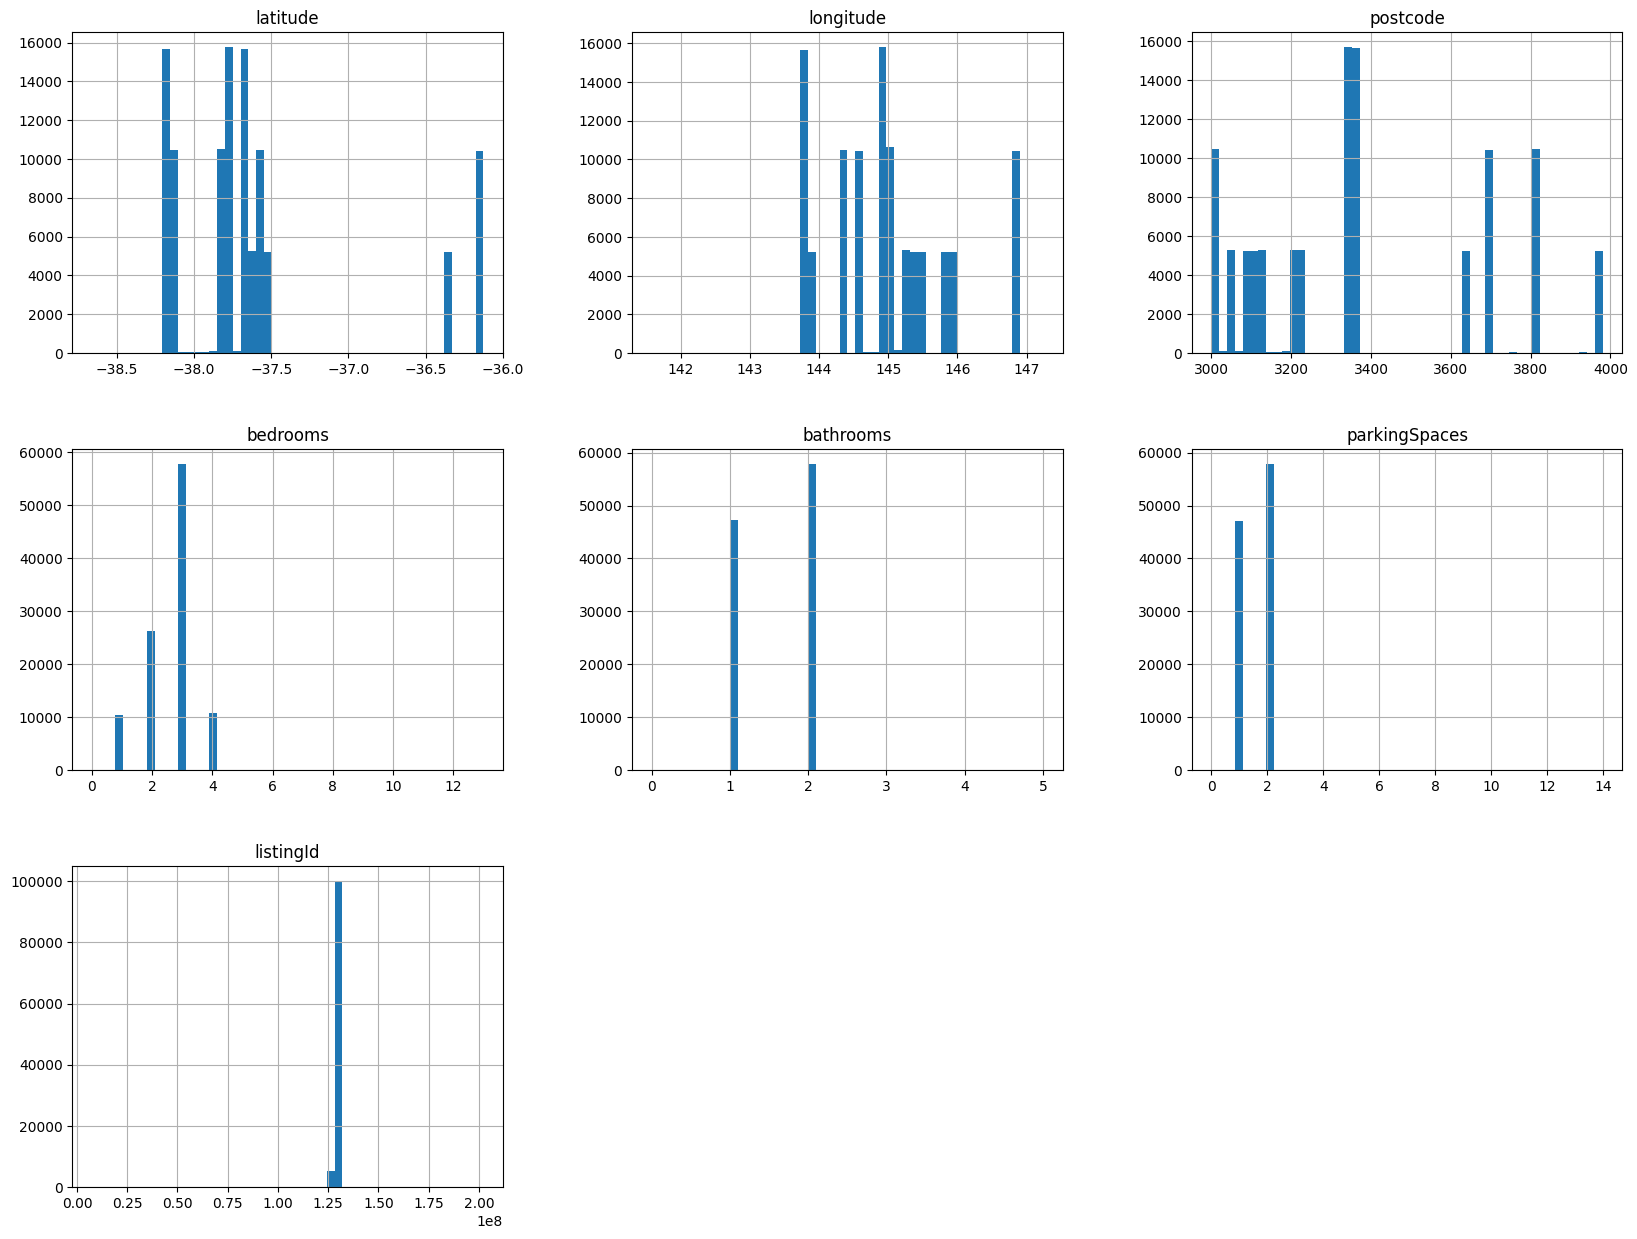

In [24]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [25]:
housing['price']


,price
0,"1,255,000"
1,"725,000"
2,"670,000"
3,"600,000"
4,"520,000"
...,...
105115,"356,000"
105116,"355,000"
105117,"345,000"
105118,"340,000"
